<a href="https://colab.research.google.com/github/bsttiv/tipos_espectrales/blob/main/Tipos_Espectrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Se monta el drive para cargar los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se importa pandas para procesar los datos
import pandas as pd
import numpy as np

In [ ]:
# Tipos espectrales en los q estamos interesados
tipos_espectrales = ["O", "B", "A", "F", "G", "K", "M"]

In [ ]:
# Funciones que se usan en el parámetro converters del método read_csv
# Su objetivo es filtrar los datos y eliminar aquellos que no estén en el formato correcto

def texto_a_float(texto):
  try:
    return np.float64(texto.strip())
  except Exception:
    return np.nan

def texto_mayuscula_primera_letra(texto):
  try:
    return texto.strip().upper()[0]
  except Exception:
    return "NaN"

In [ ]:
# Ruta de la base de datos
ruta = "drive/MyDrive/Modulo/Tipos_Espectrales/hip_main.dat"
# Nombres de las columnas (según la especificación de https://heasarc.gsfc.nasa.gov/w3browse/all/hipparcos.html)
names = ["H"+str(i) for i in range(0, 78)]
# Se lee la base de datos con los parámetros adecuados
df = pd.read_csv(ruta, sep="|", converters={"H76": texto_mayuscula_primera_letra, "H32": texto_a_float, "H37": texto_a_float, "H40": texto_a_float}, names=names, keep_default_na=False)
# Se eliminan aquellas filas cuyo tipo espectral no coincida con los buscados (O, B, A, F, G, K, M)
df = df[df["H76"].isin(tipos_espectrales)]
# Se borran las columnas que no se usarán
labels = ["H"+str(i) for i in range(0, 78) if i not in [76, 32, 37, 40]]
df.drop(labels=labels, inplace=True, axis=1)
# Se eliminan todas las filas que posiblemente no tengan valores definidos
df.dropna(axis=0, inplace=True)
# Se muestra el DataFrame
df

<ipython-input-5-3a6df1d0f274>:6: DtypeWarning: Columns (5,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, sep="|", converters={"H76": texto_mayuscula_primera_letra, "H32": texto_a_float, "H37": texto_a_float, "H40": texto_a_float}, names=names, keep_default_na=False)
<ipython-input-5-3a6df1d0f274>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=labels, inplace=True, axis=1)
<ipython-input-5-3a6df1d0f274>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


,H32,H37,H40,H76
0,9.643,0.482,0.55,F
1,10.519,0.999,1.04,K
2,6.576,-0.019,0.00,B
3,8.471,0.370,0.43,F
4,9.693,0.902,0.90,G
...,...,...,...,...
118213,9.107,1.595,1.61,K
118214,9.019,0.639,0.70,G
118215,8.868,0.999,0.98,K
118216,10.077,0.698,0.75,G


In [ ]:
# Se extraen las filas de cada tipo espectral para posteriormente usar el método describe
# Y visualizar las estadísticas de los datos

df_tipo_o = df[df["H76"] == "O"]
df_tipo_b = df[df["H76"] == "B"]
df_tipo_a = df[df["H76"] == "A"]
df_tipo_f = df[df["H76"] == "F"]
df_tipo_g = df[df["H76"] == "G"]
df_tipo_k = df[df["H76"] == "K"]
df_tipo_m = df[df["H76"] == "M"]

In [ ]:
df_tipo_o.describe()

,H32,H37,H40
count,255.000000,255.000000,255.000000
mean,8.008573,0.222824,0.258627
std,1.822831,0.302070,0.317725
min,1.566000,-0.335000,-0.370000
25%,7.060000,0.009000,0.030000
50%,8.176000,0.169000,0.180000
75%,9.246500,0.405000,0.480000
max,11.624000,1.408000,1.390000


In [ ]:
df_tipo_b.describe()

,H32,H37,H40
count,10341.000000,10341.000000,10341.000000
mean,7.843250,0.046298,0.067571
std,1.489189,0.187834,0.199207
min,0.312000,-0.400000,-0.420000
25%,7.008000,-0.066000,-0.040000
50%,7.986000,-0.004000,0.020000
75%,8.846000,0.101000,0.110000
max,12.843000,1.910000,2.480000


In [ ]:
df_tipo_a.describe()

,H32,H37,H40
count,18550.000000,18550.000000,18550.000000
mean,8.230618,0.179759,0.205729
std,1.209015,0.147032,0.158022
min,1.248000,-0.400000,-0.290000
25%,7.582000,0.075000,0.090000
50%,8.350000,0.170000,0.190000
75%,9.025000,0.267000,0.300000
max,11.934000,1.745000,2.160000


In [ ]:
df_tipo_f.describe()

,H32,H37,H40
count,25306.000000,25306.000000,25306.000000
mean,9.071121,0.476358,0.542513
std,1.158848,0.117243,0.116609
min,-0.417000,-0.400000,-0.160000
25%,8.407000,0.408000,0.480000
50%,9.132000,0.472000,0.540000
75%,9.845000,0.530000,0.600000
max,12.839000,2.180000,2.780000


In [ ]:
df_tipo_g.describe()

,H32,H37,H40
count,22409.000000,22409.000000,22409.000000
mean,9.536064,0.787254,0.817905
std,1.075112,0.206393,0.171363
min,3.418000,-0.400000,-0.100000
25%,8.977000,0.624000,0.690000
50%,9.656000,0.740000,0.790000
75%,10.240000,0.955000,0.950000
max,12.869000,2.215000,2.960000


In [ ]:
df_tipo_k.describe()

,H32,H37,H40
count,31378.000000,31378.000000,31378.000000
mean,9.710005,1.202528,1.193795
std,1.124681,0.233951,0.247679
min,1.629000,-0.400000,-0.060000
25%,9.081000,1.040000,1.020000
50%,9.850500,1.165000,1.130000
75%,10.456000,1.365000,1.350000
max,13.130000,2.867000,3.510000


In [ ]:
df_tipo_m.describe()

,H32,H37,H40
count,4148.000000,4148.000000,4148.000000
mean,10.171799,1.561587,2.269812
std,1.352534,0.209219,0.684430
min,2.849000,0.000000,0.010000
25%,9.362000,1.483000,1.840000
50%,10.350500,1.589000,2.150000
75%,11.130500,1.659000,2.560000
max,13.247000,3.315000,5.750000


Los campos a utilizar serán "H32" (que corresponde a magnitud); "H37", "H40" (índices de color); y "H76" (tipo espectral)

https://heasarc.gsfc.nasa.gov/w3browse/all/hipparcos.html

# Visualización de los datos

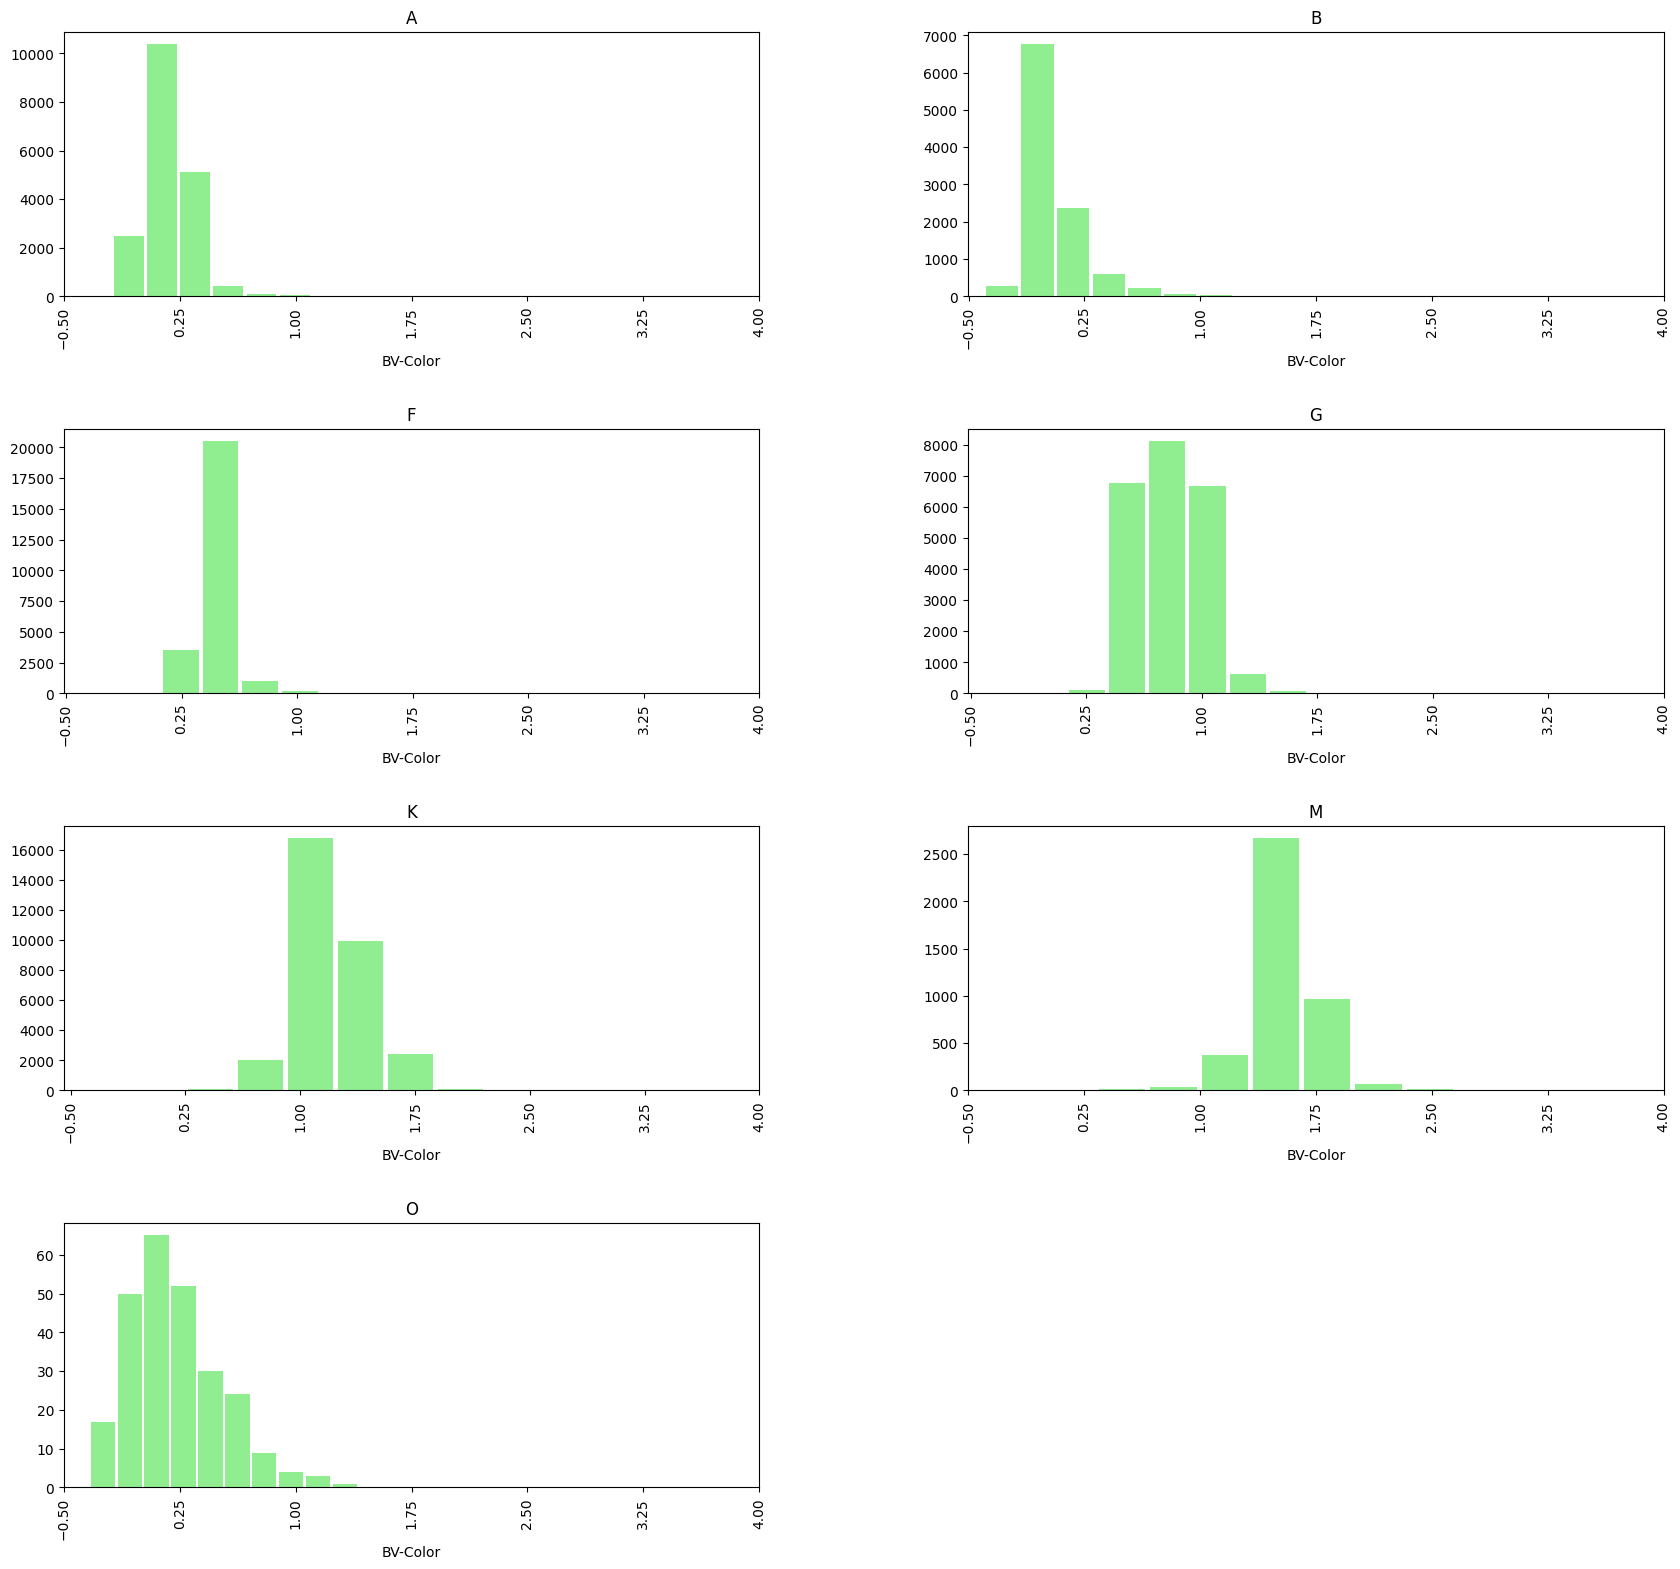

In [ ]:
import matplotlib.pyplot as plt

# Histograma BV-Color
ax = df.hist(column="H37", by=df["H76"], figsize=(20,30), layout=(6,2), color='lightgreen', rwidth=0.9)

for row in ax:
  for x in row:
    x.set_xlabel("BV-Color")
    x.set_xticks(np.linspace(-0.5, 4, 7))

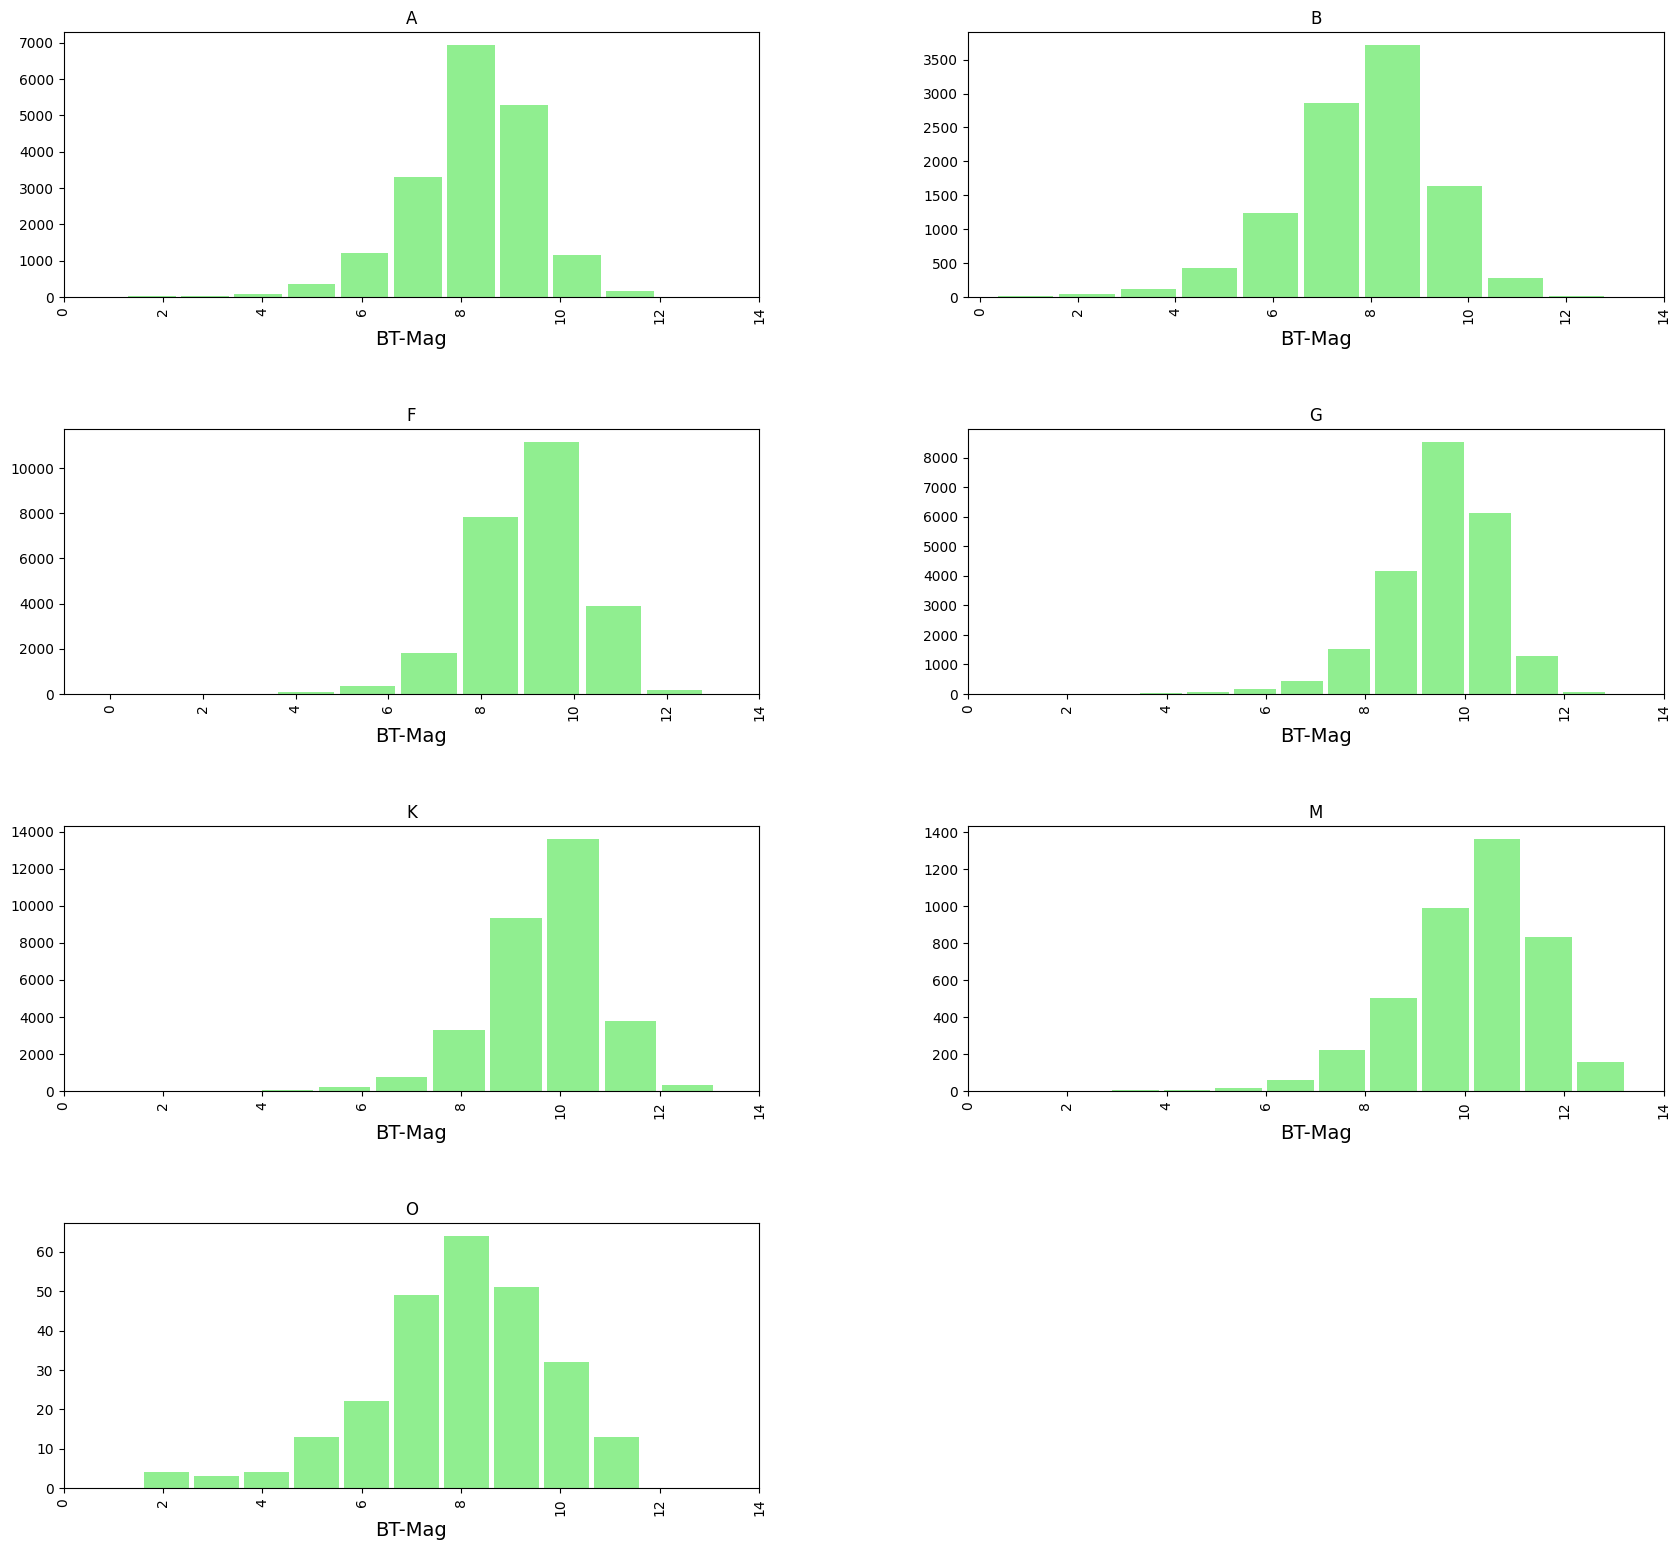

In [ ]:
# Histograma BT-Mag
ax = df.hist(column="H32", by=df["H76"], figsize=(20,30), layout=(6,2), color='lightgreen', rwidth=0.9)

for row in ax:
  for x in row:
    x.set_xlabel("BT-Mag", size=14)
    x.set_xticks(range(0, 15, 2))

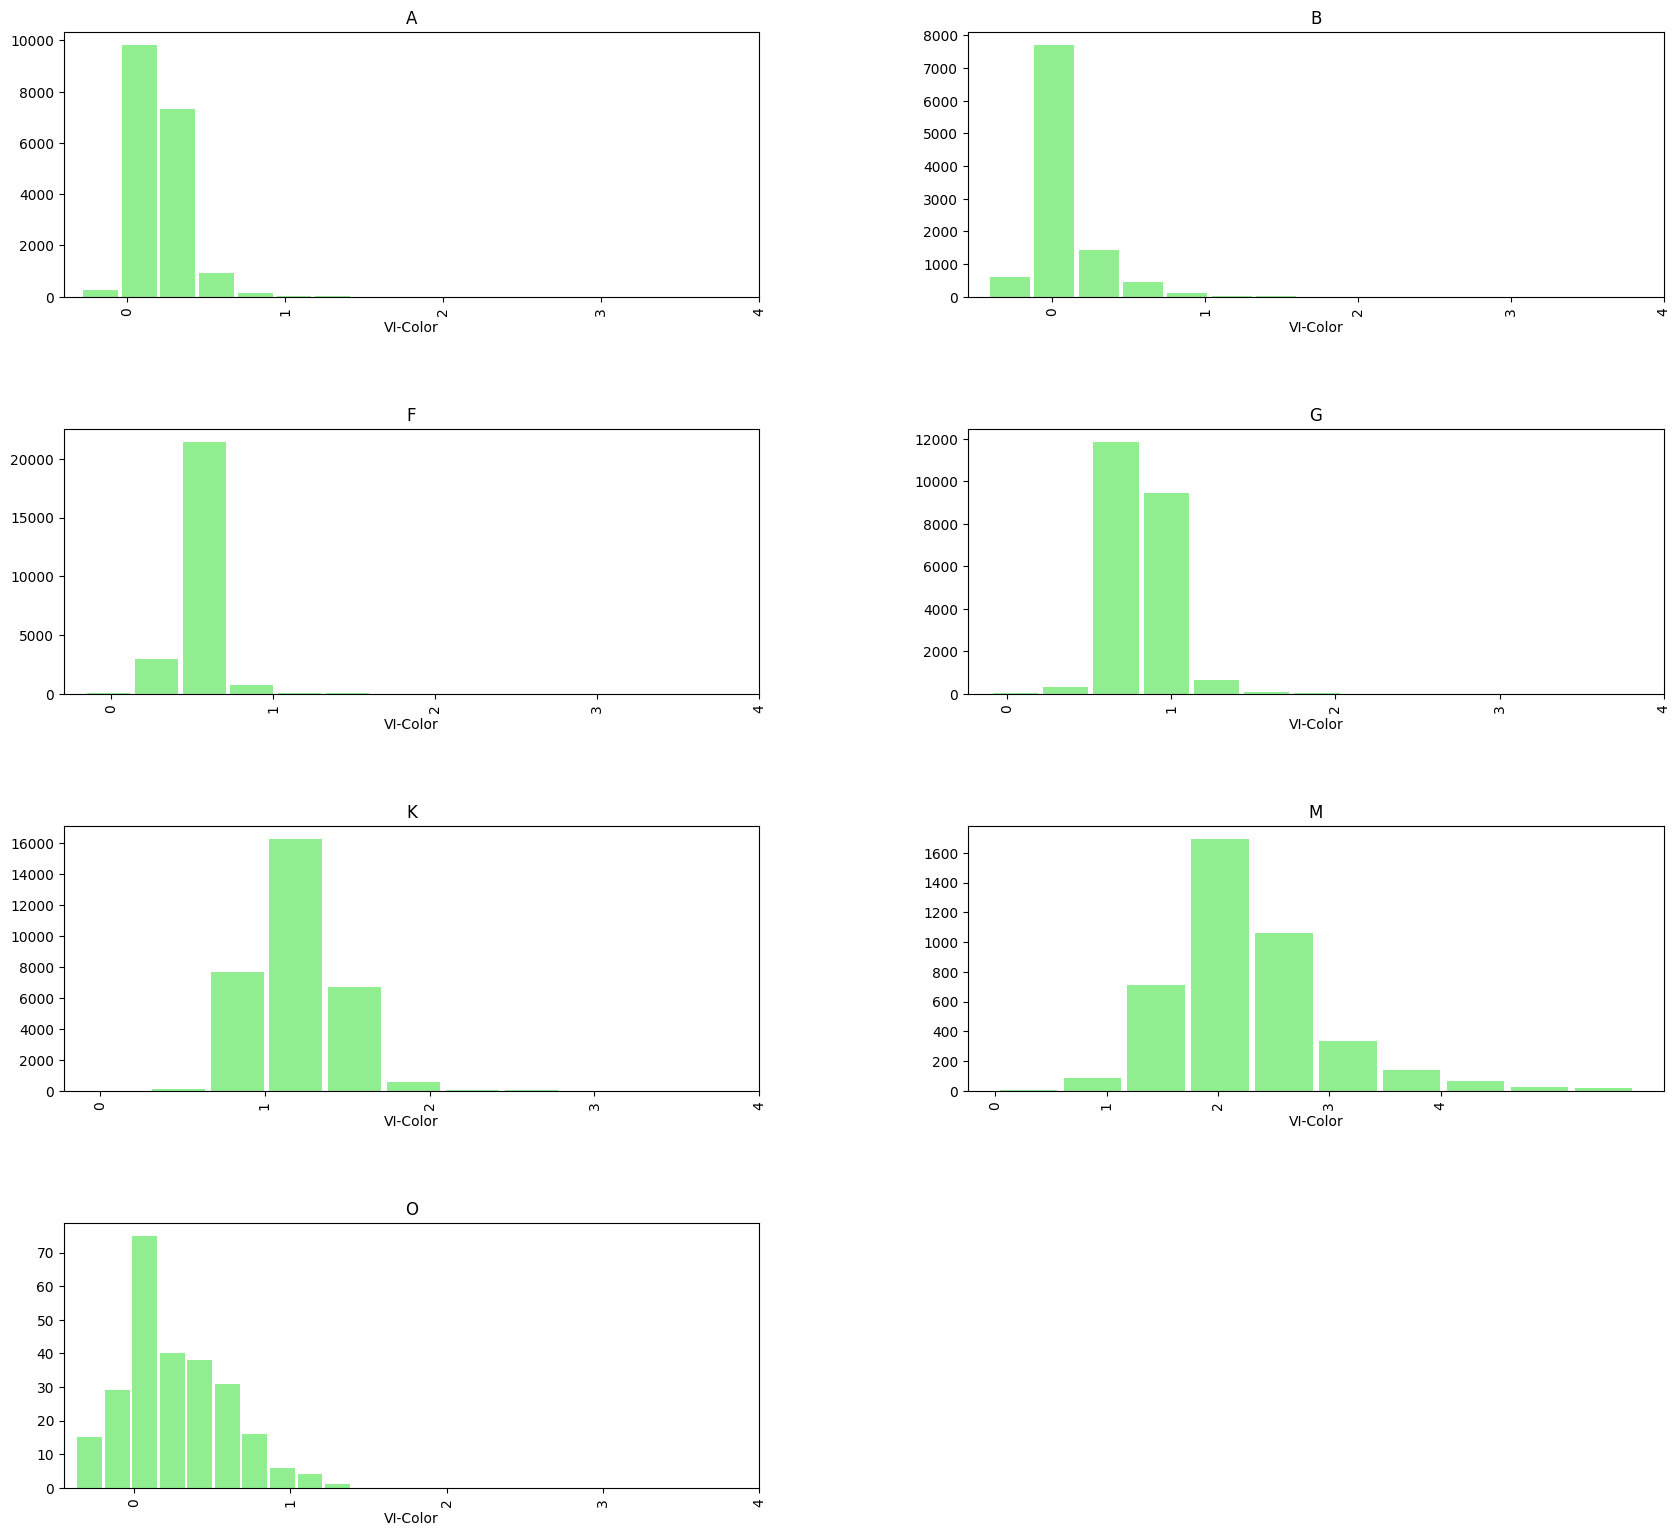

In [ ]:
# Histograma VI-Color
ax = df.hist(column="H40", by=df["H76"], figsize=(20,30), layout=(6,2), color='lightgreen', rwidth=0.9)

for row in ax:
  for x in row:
    x.set_xlabel("VI-Color")
    x.set_xticks(np.linspace(0, 4, 5))

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seabo

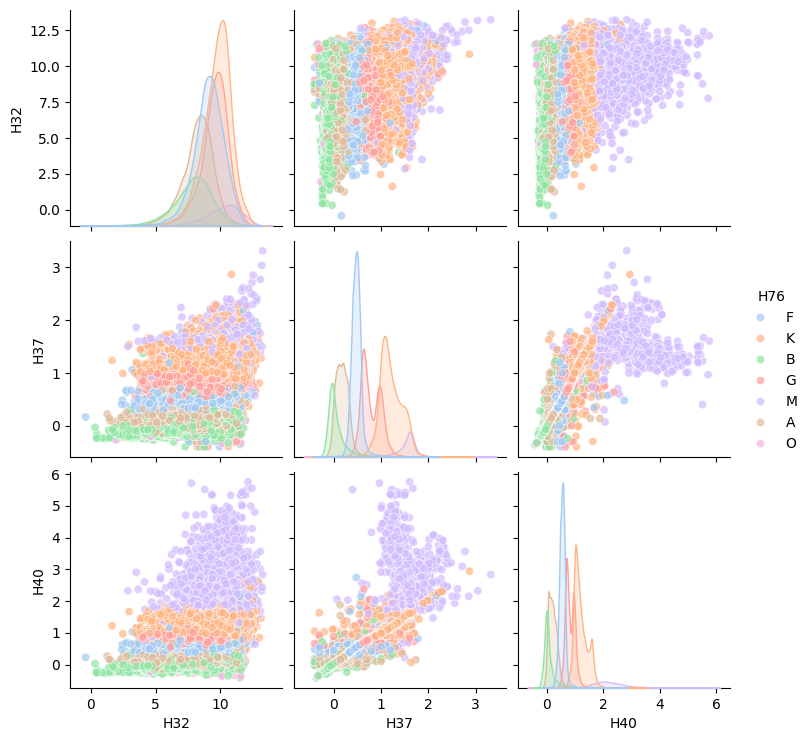

In [ ]:
import seaborn as sns

sns.pairplot(df, hue = 'H76', diag_kind = 'kde', palette= sns.color_palette("pastel"), plot_kws=dict(alpha = 0.7),
                   diag_kws=dict(fill=True))

# Modelo de machine learning

https://youtube.com/watch?v=AYICIq5jnhU&si=3e1M0dp2M4Jl7j5Y

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [ ]:
from sklearn.model_selection import train_test_split

columns = ["H32", "H37", "H40"]

x = df.loc[:, columns]
y = df.loc[:, ['H76']]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3453, train_size = .25)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(criterion="entropy")

param_dist = {'n_estimators': randint(100, 500),
              'max_depth': randint(5, 20)}

rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

rand_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
                   n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7af434500280>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7af4344f7d90>})

In [ ]:
from sklearn.metrics import accuracy_score

predicted = rand_search.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.774


<Axes: >

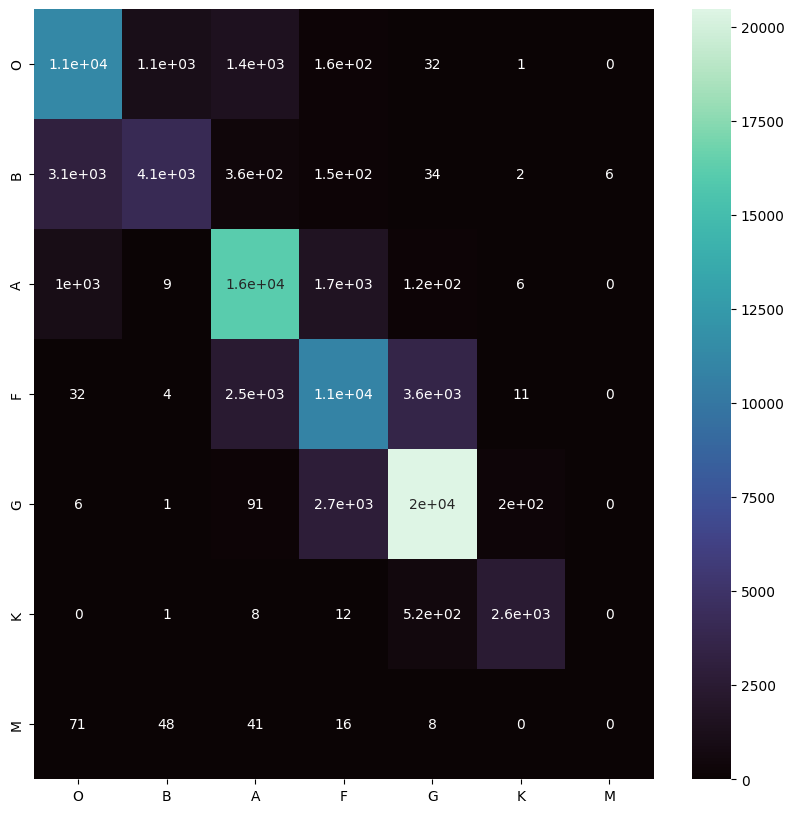

In [ ]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=tipos_espectrales, index=tipos_espectrales)
_, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, ax=ax, cmap=sns.color_palette("mako", as_cmap=True))